# Studying Hohmann transfers

In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

from astropy import units as u

from poliastro.util import norm

from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver

In [2]:
Earth.k

<<class 'astropy.constants.constant.Constant'> name='Geocentric gravitational constant' value=398600441800000.0 uncertainty=800000.0 unit='m3 / s2' reference='IAU 2009 system of astronomical constants'>

In [3]:
ss_i = Orbit.circular(Earth, alt=800 * u.km)
ss_i

7178 x 7178 km x 0.0 deg orbit around Earth (♁)

In [4]:
r_i = ss_i.a.to(u.km)
r_i

<Quantity 7178.1366 km>

In [5]:
v_i_vec = ss_i.v.to(u.km / u.s)
v_i = norm(v_i_vec)
v_i

<Quantity 7.4518315411120515 km / s>

In [6]:
N = 1000
dv_a_vector = np.zeros(N) * u.km / u.s
dv_b_vector = dv_a_vector.copy()
r_f_vector = r_i * np.linspace(1, 100, num=N)
for ii, r_f in enumerate(r_f_vector):
    man = Maneuver.hohmann(ss_i, r_f)
    (_, dv_a), (_, dv_b) = man.impulses
    dv_a_vector[ii] = norm(dv_a)
    dv_b_vector[ii] = norm(dv_b)

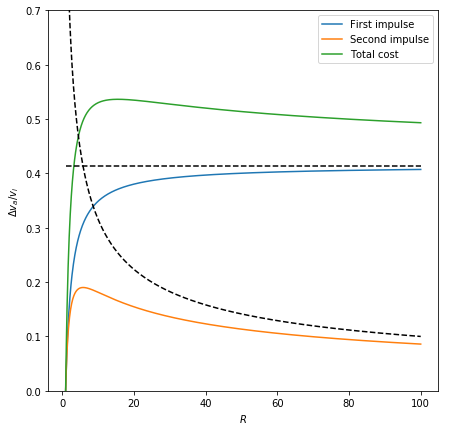

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot((r_f_vector / r_i).value, (dv_a_vector / v_i).value, label="First impulse")
ax.plot((r_f_vector / r_i).value, (dv_b_vector / v_i).value, label="Second impulse")
ax.plot((r_f_vector / r_i).value, ((dv_a_vector + dv_b_vector) / v_i).value, label="Total cost")

ax.plot((r_f_vector / r_i).value, np.full(N, np.sqrt(2) - 1), 'k--')
ax.plot((r_f_vector / r_i).value, (1 / np.sqrt(r_f_vector / r_i)).value, 'k--')

ax.set_ylim(0, 0.7)
ax.set_xlabel("$R$")
ax.set_ylabel("$\Delta v_a / v_i$")

plt.legend()
fig.savefig("hohmann.png")